# Principal Component Analysis

Principal component analysis is an unsupervised algorithm that attempts to detect the relationship between variables and identify patterns in the data such as X and y features. PCA looks to find a low-dimensional representation of the observa-tions that explain a good fraction of the variance.

If a strong correlation between variables exists, PCA attempt to reduce the dimensionality (size) only makes sense. It's about finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

Basically, PCA is fundamentally a __dimensionality reduction algorithm__ that projects the entire dataset onto a different feature subspace, but it can also be used for other purposes like visualization, noise filtering, and feature extraction and engineering to name some.

#### Goal
Reduce the dimensions of a d-dimensional dataset by projecting it onto a (k)-dimensional subspace (where k<d) in order to increase the computational efficiency while retaining important information.

#### How is k determined?
Compute __eigenvectors__ which are the principal components of a dataset and collect them into a matrix. Each of those eigenvectors is associated with an __eigenvalue__ which can be interpreted as the 'length' or 'magnitude' of the corresponding eigenvector.

#### PCA Approach
- Standardize the data so every features are measured equally
- Compute eigenvetors and eigenvalues pairs from the covariance/correlation matrix or perform singular vector decomposition
- Sort eigenvalues in descending order and choose the _k_ eigenvectors that correspond to the _k_ largest eigenvalues where _k_ is the number of dimensions of the new features subspace (k<=d)
- Construct the projection matrix _W_ from the selected _k_ eigenvectors
- Transform the original dataset _X_ via _W_ to obtain a _k_-dimensional subspace Y

#### Weakness
PCA's main weakness is that it tends to be highly affected by outliers in the data. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule. 

# Problem

1. Can gym (fitness/health) ratings from Google Reviews be predicted using other ratings across other types of categories (food, lifestyle, entertainment)? 

2. Will a model with a dimensionality reduction method applied have better prediction power than one without in this dataset?

## Data
This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.

Attribute Information:

- Attribute 1 : Unique user id (removed)
- Attribute 2 : Average ratings on churches 
- Attribute 3 : Average ratings on resorts 
- Attribute 4 : Average ratings on beaches 
- Attribute 5 : Average ratings on parks 
- Attribute 6 : Average ratings on theatres 
- Attribute 7 : Average ratings on museums 
- Attribute 8 : Average ratings on malls 
- Attribute 9 : Average ratings on zoo 
- Attribute 10 : Average ratings on restaurants 
- Attribute 11 : Average ratings on pubs/bars 
- Attribute 12 : Average ratings on local services 
- Attribute 13 : Average ratings on burger/pizza shops 
- Attribute 14 : Average ratings on hotels/other lodgings 
- Attribute 15 : Average ratings on juice bars 
- Attribute 16 : Average ratings on art galleries 
- Attribute 17 : Average ratings on dance clubs 
- Attribute 18 : Average ratings on swimming pools 
- Attribute 19 : Average ratings on gyms (Y)
- Attribute 20 : Average ratings on bakeries 
- Attribute 21 : Average ratings on beauty & spas 
- Attribute 22 : Average ratings on cafes 
- Attribute 23 : Average ratings on view points 
- Attribute 24 : Average ratings on monuments 
- Attribute 25 : Average ratings on gardens

__Characteristics__
- 5,456 rows 
- 24 columns (all numerical)

### Import libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## Part 1 - Non PCA Modeling

### Import data

Encoding Issue: 

read_csv takes an encoding option to deal with files in different formats.

    In sublime, Click File -> Save with encoding -> UTF-8

    data = pd.read_csv('data.csv', encoding = 'utf-8') # encoding

In [124]:
data = pd.read_csv('Data\\15-google-review-ratings.csv', encoding='utf-8')

In [125]:
data.head()

,Average ratings on churches,Average ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,...,Average ratings on art,Average ratings on dance,Average ratings on swimming,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty spas,Average ratings on cafes,Average ratings on view,Average ratings on monuments,Average ratings on gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [126]:
data.describe()

,Average ratings on churches,Average ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,...,Average ratings on art,Average ratings on dance,Average ratings on swimming,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty spas,Average ratings on cafes,Average ratings on view,Average ratings on monuments,Average ratings on gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.56066
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.17167
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.88000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.29000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.66000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


### Null

In [127]:
# Define a new function
def get_nulls(df):
    
    # Get null pct and counts
    null_cols = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
    null_cols_pct = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df),2), columns=['Null Data Pct'])

    # Combine dataframes horizontally
    null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

    all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

    # Print
    print('There are', len(all_nulls), 'columns with missing values.')
    return all_nulls

In [128]:
get_nulls(data)

There are 0 columns with missing values.


,Null Data Count,Null Data Pct


### X / y Split

In [129]:
# Split training
y = data['Average ratings on gyms']
X = data.drop(['Average ratings on gyms'], axis=1)

#### Fix Error: ValueError: could not convert string to float:
Convert strings your data might contain to numeric values. If they're incompatible with conversion, they'll be reduced to NaNs.

In [130]:
y = y.apply(pd.to_numeric, errors='coerce')
X = X.apply(pd.to_numeric, errors='coerce')

In [131]:
# Fill missing values
y.fillna(0, inplace=True)
X.fillna(0, inplace=True)

### Train / Test Split

In [132]:
# Import split module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [133]:
X_train.describe()

,Average ratings on churches,Average ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,...,Average ratings on juice,Average ratings on art,Average ratings on dance,Average ratings on swimming,Average ratings on bakeries,Average ratings on beauty spas,Average ratings on cafes,Average ratings on view,Average ratings on monuments,Average ratings on gardens
count,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,...,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000
mean,1.453052,2.330345,2.476860,2.780108,2.950687,2.896860,3.355161,2.555550,3.129174,2.825689,...,2.203121,2.207730,1.197896,0.950978,0.981325,1.014242,0.969980,1.735814,1.528062,1.556266
std,0.826150,1.430383,1.238991,1.300416,1.336791,1.281832,1.412794,1.122755,1.355840,1.310707,...,1.580947,1.713043,1.117127,0.979405,1.218188,1.211068,0.935385,1.586452,1.311276,1.164580
min,0.000000,0.000000,0.000000,0.860000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.370000,1.537500,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.630000,...,1.040000,0.860000,0.690000,0.580000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.440000,2.670000,2.700000,3.230000,2.200000,2.810000,2.690000,...,1.500000,1.340000,0.800000,0.740000,0.690000,0.690000,0.770000,1.030000,1.070000,1.290000
75%,1.810000,2.700000,2.730000,3.732500,4.310000,3.832500,5.000000,3.200000,5.000000,3.522500,...,2.787500,4.430000,1.160000,0.910000,0.860000,0.870000,1.010000,2.060000,1.572500,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Scaler

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Transform the variables to be on the same scale
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Evaluation - RMSE

In [135]:
# Create a function that will calculate error
def base_rmse(y, y_pred):
    '''
    Return the sqrt of the mean squared error between the observed and predicted values
    '''
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return rmse

### Random Forest

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

# Random Forest
model = RandomForestRegressor(n_estimators=500, random_state=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rf_rmse = base_rmse(y_test, y_pred)
print('Random Forest RMSE: {:.5f}'.format(rf_rmse))

Random Forest RMSE: 0.40334


### Feature Importance

In [137]:
headers = X.columns

# Create a new function to capture feature importance for free models (RF, GB, XGB)
def feature_importance(model):
    
    importance = pd.DataFrame({'Feature': headers,
                               'Importance': np.round(model.feature_importances_,5)})
    
    importance = importance.sort_values(by='Importance', ascending=False).set_index('Feature')
    
    return importance

In [138]:
feature_importance(model)

,Importance
Feature,
Average ratings on swimming,0.24165
Average ratings on monuments,0.13316
Average ratings on bakeries,0.11781
Average ratings on burger/pizza,0.11438
Average ratings on view,0.03912
Average ratings on cafes,0.03479
Average ratings on parks,0.02877
Average ratings on theatres,0.02717
Average ratings on malls,0.02520


Swimming rating is our top feature, which makes sense since someone who may rate gym (fitness) high or low will hopefully have similar interests or disinterests in swimming as well. Although one may like to gym but hate to swim. 

Beach rating basically has zero importance in predicting a gym rating value. 

## Part 2 - PCA Modeling

Let's attempt to apply principal component analysis on the dataset to remove any features that the algorithm does not find important enough and reduce the data dimensionality.

### More Notes

#### Intro
Now that we have loaded the same dataset, we will find a lower-dimensional representation of the data of the n obsevations as much as possible. 

#### Idea
The idea is that each of the n observations lives in a p-dimensional space, but now all of these dimensions are equally interesting (hence lowering dimensionality). Each of the dimensions found by PCA is a _linear combination_ of the _p_ features or principal components and we can take these linear combinations of the measurements and reduce the number of plots necessary for visual analysis while retaining most of the information present in the data.

#### Scaling
Before applying PCA, the features should be centered to have mean zero. The results obtained when PCA is performed will also depend on whether the variables have been individually scaled. 

For example, scaling is important because if performed on unscaled features then the first principal component vector will have a very large loading since that specific feature has the highest variance. So we typically want to scale each variable to have a standard deviation of one before we perform PCA.

#### Variance
The eigenvalues in PCA tell you how much variance can be explained by its associated eigenvector. For example, if 5 out of 10 vectors will have 99% explainability then most likely the number of components used will be 5. Therefore, the highest eigenvalue indicates the highest variance in the data was observed in the direction of its eigenvector. 

Accordingly, if you take all eigenvectors together, you can explain all the variance in the data sample. 
- PVE = Proportion of Variance Explained

#### How many principal components to use?
The main point of PCA is to significantly reduce the number of features, we want to use the smallest number of principal components possible to explain most of the variability. In other words, we would like to use the smallest number of principal components required to get a _good_ understanding of the data.

There is no single or simple answer to answer this question. One way to determine the components required is to visualize the data by examining a _screen plot_.

Since we want to explain a good amount of variation of the dataset, we can look at the plot and look for a point at which the proportion of variance explained by each subsequent principal component dropss off. This point is often refered to as an elbow because of the bent shape.

In [139]:
pca_initial_data = pd.read_csv('Data\\15-google-review-ratings.csv', encoding='utf-8')

In [140]:
pca_initial_data = pca_initial_data.apply(pd.to_numeric, errors='coerce')
pca_initial_data.fillna(0, inplace=True)

### Import PCA estimator

In [141]:
from sklearn.decomposition import PCA

# Try 2 components
pca = PCA(n_components=2)
pca.fit(pca_initial_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [142]:
print('Principal Components:')
print(pca.components_)

print('Explained Variance:')
print(pca.explained_variance_)

Principal Components:
[[ 0.15878353  0.15028248  0.1810653   0.2210112   0.17951566  0.02744772
  -0.23120562 -0.16792779 -0.26706348 -0.2379595  -0.21892376 -0.21780875
  -0.23603029 -0.31120504 -0.26571126  0.03880129  0.04511681  0.04593695
   0.07029447  0.11013094  0.13939251  0.37614969  0.27605277  0.22274357]
 [ 0.05945763 -0.07706598 -0.11861985 -0.24108543 -0.31523198 -0.33237952
  -0.27790993 -0.22617222 -0.22343158 -0.21297165 -0.09500192  0.10265394
   0.17055798  0.29273958  0.31341268  0.10255899  0.18121774  0.21399706
   0.28866249  0.21634864  0.13588045  0.07691375  0.05969874  0.07080223]]
Explained Variance:
[7.92227568 5.84569402]


### We want to split the data first then apply on X

In [143]:
# Split training
y_pca = pca_initial_data['Average ratings on gyms']
X_pca = pca_initial_data.drop(['Average ratings on gyms'], axis=1)

### Standardize the Data
Normally we would want to standardize our data before PCA but since every feature is on the same scale already from 1-5, there is no need to.

### Check Components

In [144]:
pca = PCA(n_components=23)
pca.fit(X_pca)
print('Explained Variance')
print(np.cumsum(pca.explained_variance_ratio_))

Explained Variance
[0.20459981 0.34967604 0.43385625 0.51183516 0.56871404 0.61986816
 0.66431943 0.70248851 0.73595442 0.76575898 0.79311944 0.81854555
 0.8422926  0.86329186 0.88401024 0.90269124 0.92027488 0.93706683
 0.95181499 0.96553445 0.97871838 0.99012221 1.        ]


If we look closely, the change of the subsequent explained variance decreases. So we want to find a point where it would still explain the dataset the best way it can with the lowest amount of components.

### Plot

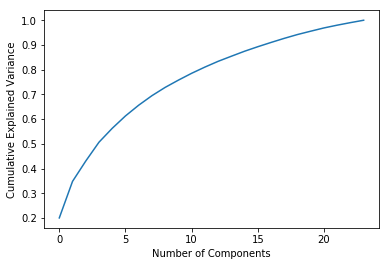

In [145]:
# PCA
pca = PCA().fit(pca_initial_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set plot features
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Choosing the amount of components

In [146]:
# # Set component number
# pca = PCA(n_components=15)

# Make an instance of the Model
pca = PCA(.90)

# Fit the dimensionality reduction algorithm
pca.fit(pca_initial_data)

# Transform the dataset
data_transformed_pca = pca.transform(pca_initial_data)
print("Original shape:   ", pca_initial_data.shape)
print("Transformed shape:", data_transformed_pca.shape)

Original shape:    (5456, 24)
Transformed shape: (5456, 17)


## Model

After checking the components and applying 90% variance explainability, we can now try it on the training set only.

### Fit PCA on the training set

You can find out how many components PCA choose after fitting the model using pca.n_components_ . In this case, 90% of the variance amounts to 17 principal components.

In [147]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Apply the mapping (transform) to both the training set and the test set

In [148]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### Random Forest new datasets

In [149]:
# Random Forest
model_pca = RandomForestRegressor(n_estimators=500, random_state=15)
model_pca.fit(X_train, y_train)
y_pred_pca = model_pca.predict(X_test)
rf_rmse_pca = base_rmse(y_test, y_pred_pca)
print('Random Forest RMSE: {:.5f}'.format(rf_rmse))

Random Forest RMSE: 0.40334
